Alifia Shafira

1301194102

IF-43-PIL-DS01 [DDR]

# Preprocessing Data

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec

In [ ]:
# Import Dataset
data = pd.read_csv("breast-cancer.csv")
data.sample(5)
# B = 0 (NO), M = 1 (YES)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.49,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720
159,871149,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,12.36,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685
216,8811523,B,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.031420,...,13.25,27.10,86.20,531.2,0.1405,0.30460,0.28060,0.11380,0.3397,0.08365
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.13520,0.04506,0.05093,0.2880,0.08083
385,90291,M,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,...,15.79,31.71,102.20,758.2,0.1312,0.15810,0.26750,0.13590,0.2477,0.06836


In [ ]:
# Mendapatkan informasi pada masing masing kolom data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Drop baris yang memiliki nilai NaN pada dataset
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Pengecekkan data duplikat pada dataset 
data.duplicated().sum()

0

In [ ]:
dataCorr['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

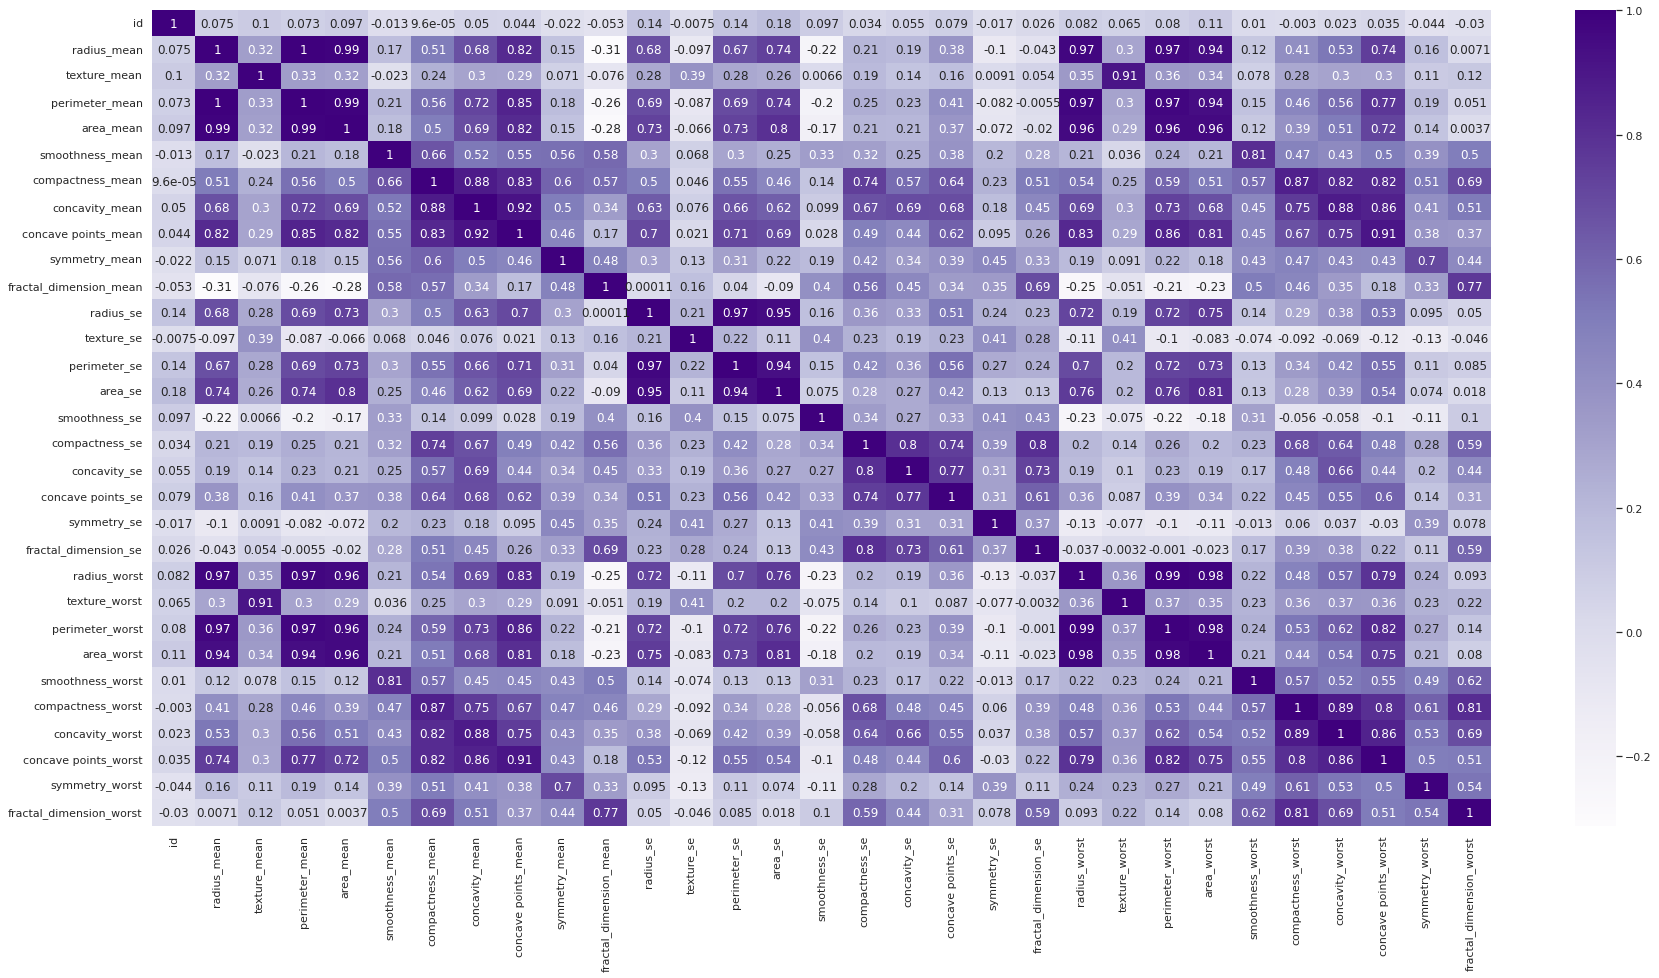

In [ ]:
# Korelasi antar kolom
corr_train = data.corr()
plt.figure(figsize = (30,15))
heatmap_train = sn.heatmap(corr_train, annot=True, cmap="Purples")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


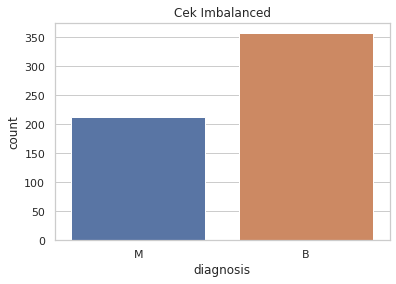

In [ ]:
#Mengecek Imbalanced Data pada kolom "Diagnosis"
sn.set(style="whitegrid")
sn.countplot(data.diagnosis)
plt.title("Cek Imbalanced")
plt.show()

In [ ]:
#Dilakukan mapping agar tipe data menjadi int
diagnosis_label = {'B':0, 'M':1}
data.replace({'diagnosis': diagnosis_label}, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Splitting

In [ ]:
# Feature Selection pada kolom yang akan digunakan
x = data.iloc[:, 2:].values #x adalah fitur
y = data.iloc[:, 1].values #y adalah target label

In [ ]:
#Data splitting dengan pembagian 80% data train dan 20% data test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

# Klasifikasi

In [ ]:
# Klasifikasi dengan algoritma KNN
knn = KNeighborsClassifier(n_neighbors = 7)
knn = knn.fit(x_train, y_train)
result_knn = knn.predict(x_test)
accuracy = acc(y_test, result_knn)
print('K-Nearest Neighbor Score Result')
print("Accuracy   :", accuracy)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != result_knn).sum()))

K-Nearest Neighbor Score Result
Accuracy   : 0.956140350877193
Number of mislabeled points out of a total 114 points : 5


# Evaluasi

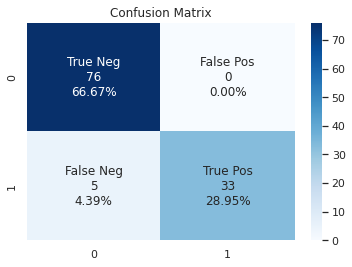

In [ ]:
#Visualisasi Menggunakan Confusion MatrixS
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, result_knn).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, result_knn).flatten()/np.sum(confusion_matrix(y_test, result_knn))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.title('Confusion Matrix')
sn.heatmap(confusion_matrix(y_test, result_knn), annot=labels, fmt='', cmap='Blues')

In [ ]:
#Hasil Evaluasi Klasifikasi
print('K-Nearest Neighbor Score Result')
print("Accuracy: ",acc(y_test,result_knn))
print("Precision: ",pr(y_test,result_knn,average='macro'))
print("Recall: ",rec(y_test,result_knn,average='macro'))
print("F1-Score: ",f1(y_test,result_knn,average='macro'))

K-Nearest Neighbor Score Result
Accuracy:  0.956140350877193
Precision:  0.9691358024691358
Recall:  0.9342105263157895
F1-Score:  0.9488651655153852


# Eksperimen

In [ ]:
#Eksperimen Percobaan Klasifikasi menggunakan Naive Bayes
gnb = GaussianNB()
result_GaussianNB = gnb.fit(x_train, y_train).predict(x_test)
accuracy = acc(y_test, result_GaussianNB)
print('Naive Bayes Score Result')
print("Accuracy   :", accuracy)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != result_GaussianNB).sum()))

Naive Bayes Score Result
Accuracy   : 0.9385964912280702
Number of mislabeled points out of a total 114 points : 7


In [ ]:
#Eksperimen Percobaan Klasifikasi menggunakan Naive Bayes
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
decision_tree = decision_tree.fit(x_train, y_train)
result_decision_tree = decision_tree.predict(x_test)
accuracy = acc(y_test, result_decision_tree)
print('Decision Tree Score Result')
print("Accuracy   :", accuracy)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != result_decision_tree).sum()))

Decision Tree Score Result
Accuracy   : 0.9385964912280702
Number of mislabeled points out of a total 114 points : 7


# Referensi

Data Splitting: 

https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

https://towardsdatascience.com/splitting-a-dataset-e328dab2760a

Confusion Matrix Visualization: 

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Klasifikasi:

https://scikit-learn.org/stable/modules/naive_bayes.html

Remapping:

https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/
